In [1]:
%run helpers/example_setup.ipynb

id: 1

defined db, cell, layout, gnd_net variables.


In [2]:
p0 = PolygonData([(0,0), (2,0), (2,2), (0,2)])
p1 = PolygonData([(1,1), (3,1), (3,3), (1,3)])

pi = PolygonData.intersect(p0,p1)
pu = PolygonData.unite([p0,p1])
ps = PolygonData.subtract(p0,p1)
px = PolygonData.xor(p0,p1)
pc = PolygonData.convex_hull([p0, p1])
pe = pu[0].expand(1, True, 1)
bbox1 = pu[0].bbox()
bbox2 = PolygonData.bbox_of_polygons([p0, p1])

<Figure size 640x480 with 0 Axes>

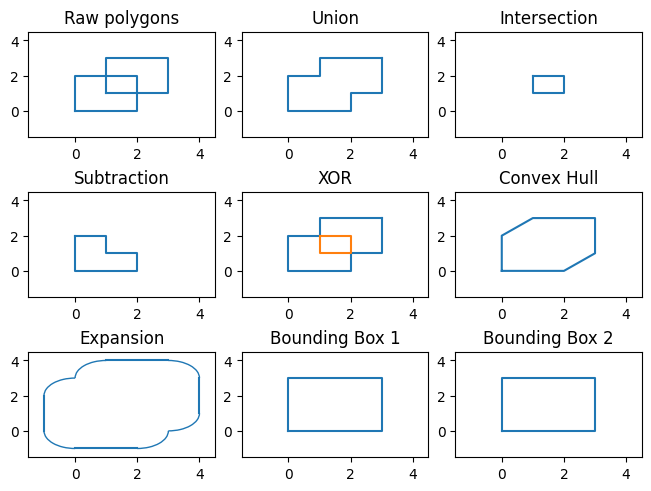

In [3]:
%run helpers/plot.ipynb

plt.figure()
fig, axs = plt.subplots(3,3, constrained_layout=True)
plt.setp(axs, xlim=(-1.5,4.5), ylim=(-1.5,4.5))

plot_polys(axs[0][0], [p0, p1], "Raw polygons")
plot_polys(axs[0][1], pu, "Union")
plot_polys(axs[0][2], pi, "Intersection")
plot_polys(axs[1][0], ps, "Subtraction")
plot_polys(axs[1][1], px, "XOR")
plot_polys(axs[1][2], [pc], "Convex Hull")
plot_polys(axs[2][0], pe, "Expansion")
plot_polys(axs[2][1], [PolygonData(lower_left=bbox1[0], upper_right=bbox1[1])], "Bounding Box 1")
plot_polys(axs[2][2], [PolygonData(lower_left=bbox2[0], upper_right=bbox2[1])], "Bounding Box 2")

plt.show()

In [4]:
lcc = layout.layer_collection
lcc.add_layer_top(StackupLayer.create('layer', LayerType.SIGNAL_LAYER, "2mm", 0, "copper"))

for p in [p for polys in [[p0, p1, pc], pu, pi, ps, px, pe] for p in polys]:
    Polygon.create(layout, 'layer', gnd_net, p)

In [5]:
%run helpers/example_teardown.ipynb